In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
!pip install face_recognition

In [ ]:
import cv2 , os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [ ]:
image_path = "/gdrive/My Drive/Colab/samsungLions.jpg"
image=fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

In [ ]:
for(top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top),(right, bottom),(0,255,0),3)

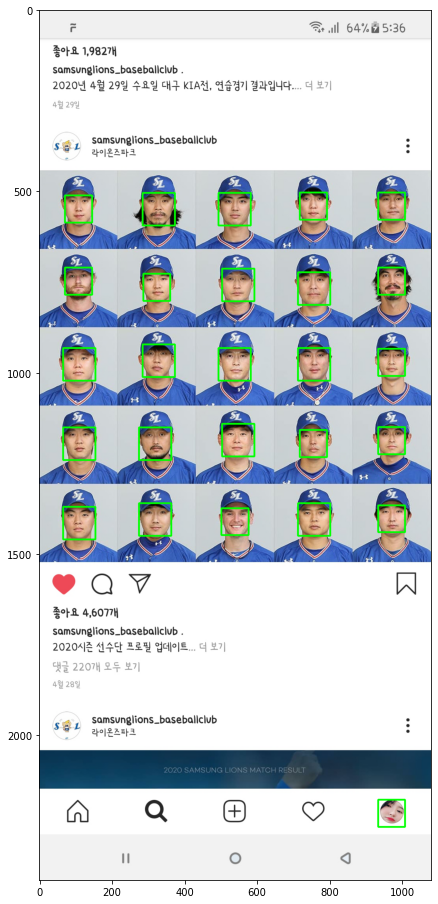

In [ ]:
plt.rcParams["figure.figsize"] = (16,16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


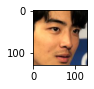

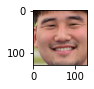

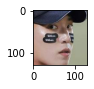

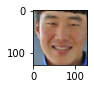

In [ ]:
plt.rcParams["figure.figsize"] = (1,1)
# 이미지 파일을 로드하여 known_person_list 리스트 생성
known_person_list=[]
known_person_list.append(fr.load_image_file("/gdrive/My Drive/Colab/person1.JPG"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/Colab/person2.JPG"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/Colab/person3.JPG"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/Colab/person4.JPG"))

# 얼굴을 인식을 하여 감지된 부분을 잘라낸 다음 known_face_list에 저장
known_face_list = []
for person in known_person_list:
  # 얼굴 좌표를 알아내서 잘라낸다
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]
  # known_face_list에 잘라낸 face_image를 저장
  known_face_list.append(face_image)

# known_face_list에 저장된 얼굴들 출력
for face in known_face_list:
  plt.imshow(face)
  plt.show()

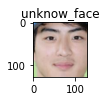

In [ ]:
unknown_person = fr.load_image_file("/gdrive/My Drive/Colab/unknown.JPG")

top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

plt.title("unknow_face")
plt.imshow(unknown_face)
plt.show()

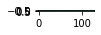

In [ ]:
# unknown_person_face를 인코딩
enc_unknown_face = fr.face_encodings(unknown_face)

plt.imshow(enc_unknown_face)
plt.show()

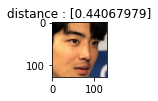

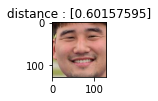

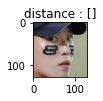

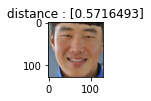

In [ ]:
# 등록된 얼굴 리스트를 비교
for face in known_face_list:
  # 등록된 얼굴을 인코딩
  enc_known_face = fr.face_encodings(face)
  # 등록된 얼굴과 새로운 얼굴의 distance 얻기
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

  plt.title("distance : "+str(distance))
  plt.imshow(face)
  plt.show()